# Исследование закономерностей, определяющих успешность игры

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы

1. *Открытие файла с данными и изучение общей информации*

2. *Предобработка данных*
    
    - Привести названий стоблцов к нижнему регистру
    - Найти и изучить пропущенные значения в столбцах
    - Рассмотреть типы данных в каждом столбце
    - Поссчитать суммарные продажи во всех регионах и записать их в отдельный столбец

3. *Исследовательский анализ данных:*
    
    - Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - Не учитывать в работе данные за предыдущие годы.
    - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
    - Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. *Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):*
    
    - Самые популярные платформы (топ-5). Описать различия в долях продаж.
    - Самые популярные жанры (топ-5). Пояснить разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. *Проверить гипотезы*
   
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 
   - Задать самостоятельно пороговое значение alpha
    
    **Пояснить:**
    
   - Как сформулировали нулевую и альтернативную гипотезы;
   - Какой критерий применили для проверки гипотез и почему.

6. *Общий вывод*

### Знакомство с данными и изучение общей информациии.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
pd.set_option('display.max_columns', None)

display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [65]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [66]:
data.isna().sum() # количество пропущенных значений для каждого столбца

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

<b>Вывод:</b>
- В таблице 16715 строк, 11 столбцов;
- Названия стоблцов необходимо привести к нижнему регистру
- Есть пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`
- Тип данных `Year_of_Release` надо поменять на datetime, так как значение - год, `Critic_Score` возможно надо поменять на int64, так как в первых 20 строках стоят целые числа, `User_Score` надо поменять на float64, так как там числа с плавающей точкой

### Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [67]:
data.columns = data.columns.str.lower() #приведение к нижнему регистру
print(data.columns) #проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Обработаем пропуски в каждом столбце:

- `name`, `genre` - возможно, данные были утеряны. Пропуски составили всего **0.011%** от всего датафрейма, поэтому мы можем от них избавиться

In [68]:
data[data['name'].isna()] #узнали, что два пропуска в столбцах name и genre - одни и  те же строки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [69]:
# Комментарий ревьюера
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [70]:
data['name'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски
data = data.dropna(subset = ['name']).reset_index(drop=True) #удаляем пропущенные значения для столбца name
data = data.dropna(subset = ['genre']).reset_index(drop=True) #удаляем пропущенные значения для столбца genre
print(data['name'].isnull().sum()) #проверяем остались ли пропуски
print(data['genre'].isnull().sum())

0
0


- `year_of_release` - возможно данные были утеряны. Пропуски составили всего **1.6%** от всего датафрейма, поэтому мы можем от них избавиться 

In [71]:
data['year_of_release'].isna().sum() / len(data) * 100 #считаем, сколько процентов составляют пропуски
data = data.dropna(subset = ['year_of_release']).reset_index(drop=True) #удаляем пропущенные значения для столбца year_of_release
print(data['year_of_release'].isnull().sum()) #проверяем остались ли пропуски

0


В столбцах `critic_score`, `user_score`, `rating` достаточно большой процент пропусков (**51.5%, 40.2%, 40.6%**), скорее всего рейтинг просто еще не проставлен, потому что, например не открыты чарты, оставим пропуски как есть

In [72]:
print(data['critic_score'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски
print(data['user_score'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски
print(data['rating'].isna().sum() / len(data) * 100) #считаем, сколько процентов составляют пропуски

51.453417659936754
40.166626125030405
40.59839455120409


Также проверим уникальные значения столбцов critic_score и user_score, чтобы убедиться, что все значения явлются числовыми (кроме пропусков) для дальнейших вычислений.

In [73]:
print(data['critic_score'].unique())
print(data['user_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Заметили, что в столбце `user_score` есть значение 'tbd', что означает to be determined. Поссчитаем, сколько таких значений в датафрейме и какой процент от всего объема данных они составляют.

In [74]:
len(data.query('user_score == "tbd"')) / len(data) * 100 #считаем, сколько процентов составляют 'tbd'

14.449039163220629

Процент достаточно большой, удалять эти строки нельзя. Используем заглушку -1.

In [75]:
data.loc[(data['user_score'] == 'tbd'), "user_score"] = -1
print(data['user_score'].unique()) #проверка

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' -1 '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Теперь изменим тип данных, там где это возможно:

- `year_of_release` - datetime
- `critic_score` - int64 - невозможно, так как есть пропуски
- `user_score` - float64

In [76]:
data['year_of_release'] = data['year_of_release'].astype('int') #меняем тип данных
print(data['year_of_release'].dtype) #проверяем тип данных

int64


In [77]:
data['user_score'] = data['user_score'].astype('float') #меняем тип данных для расчетов
print(data['user_score'].dtype) #проверяем тип данных

float64


Изучим уникальные значения в столбце name и устраним дубликаты. Так как одна и та же игра могла быть выпущена на разных платформах в разные годы, и это считается за разные релизы, то необходимо проверять совпадение названия игры, платформы и года.

In [78]:
data['name'].value_counts() 
data['name'].unique() #уникальные значения в столбце
len(data['name'].unique()) #подсчет уникальных значений в столбце

11426

In [79]:
print(data.duplicated(subset=['name','platform', 'year_of_release']).sum()) #ищем дубликаты
data.loc[data.duplicated(subset=['name','platform', 'year_of_release'])] #смотрим, какие строки являются дубликатами

1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [80]:
data.query('name == "Madden NFL 13"') # смотрим, что за дубликаты по игре Madden NFL 13

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Действительно, запись об игре Madden NFL 13, выпущенной на платформе PS3 в 2012 году, встречается два раз. Удалим дубликат.

In [81]:
data.drop_duplicates(subset = ['name','platform', 'year_of_release'], keep = 'first', inplace = True) #избавляемся от дубликатов
print(data.duplicated(subset=['name','platform', 'year_of_release']).sum()) #проверка

0


Поссчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [82]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) #считаем суммарные продажи
display(data.head()) #проверяем, корректно ли заполнен новый столбец

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Нашли информацию о рейтинге в интернете:
    
    Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.
    
Таким образом, в таблице не должно быть информации по данному рейтингу до 1994 года, а также этот рейтинг, возможно, отсутствует у игр, выпущенных не в Канаде и США. Используем заглушку `'no_rating'` для дальнейшего анализа.
</div>

In [83]:
data.loc[(data['rating'].isna()), "rating"] = 'no_rating'
print(data['rating'].unique()) #проверка

['E' 'no_rating' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [84]:
display(data.info()) #проверяем общую информацию о датафрейме после предобработки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   float64
 10  rating           16443 non-null  object 
 11  sum_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


None

**Вывод:**
- Были приведены названия столбцов к нижнему регистру
- Были устранены пропуски в данных там, где это возможно, убрали дубликаты, использовали заглушки
- Датафрейм для исследования содержит 16441 строку, таким образом, было удалено 1.6% первоначальных данных

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы, для этого сделаем сводную таблицу и построим график. Важны ли данные за все периоды?

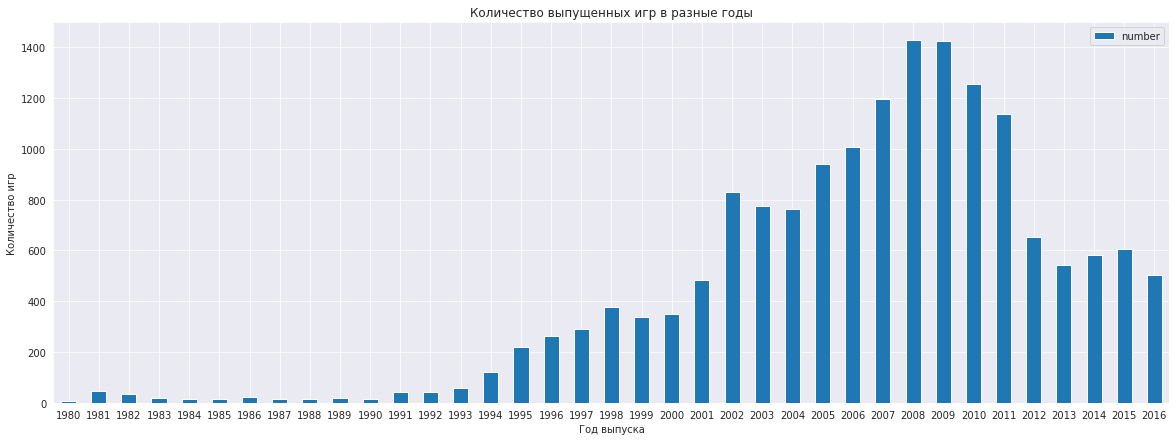

In [85]:
games_years = (
    data.pivot_table(
        index='year_of_release', values='name', aggfunc='count'
                            )
                .reset_index()
                .rename(columns={'name':'number'})
)
ax = games_years.plot.bar(x='year_of_release', y='number', rot=0, figsize=(20,7), 
                          title='Количество выпущенных игр в разные годы')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
None

По графику видно, что с 1994 года начался активный рост выпущенных игр, он продолжился до 2011 года и потом пошел на спад. Пиковые годы - 2008 и 2009. Для анализа нам будет интересен период активного роста и последующего спада - с 1994 по 2016.

In [86]:
data = data[data['year_of_release']>=1994]

Посмотрим, как менялись продажи по платформам. Сделаем сводную таблицу и построим график.

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


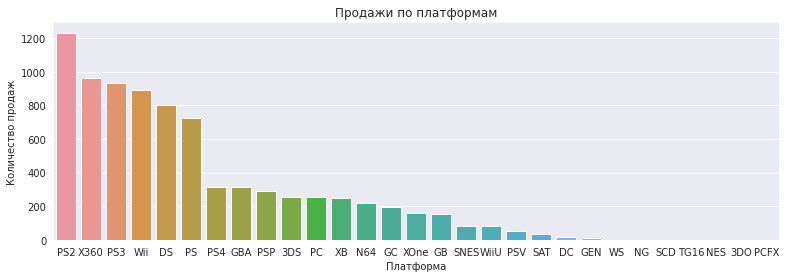

In [87]:
sum_sales_platform = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False)
display(sum_sales_platform)
plt.figure(figsize=(13,4))
sns.barplot(x=sum_sales_platform.index,y=sum_sales_platform['sum_sales'])
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')
None

Выберем платформы с наибольшими суммарными продажами: по графику видно, что этими платформами являются **PS2, X360, PS3, Wii, DS и PS**. Построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

<AxesSubplot:xlabel='year_of_release'>

<AxesSubplot:xlabel='year_of_release'>

<AxesSubplot:xlabel='year_of_release'>

<AxesSubplot:xlabel='year_of_release'>

<AxesSubplot:xlabel='year_of_release'>

<AxesSubplot:xlabel='year_of_release'>

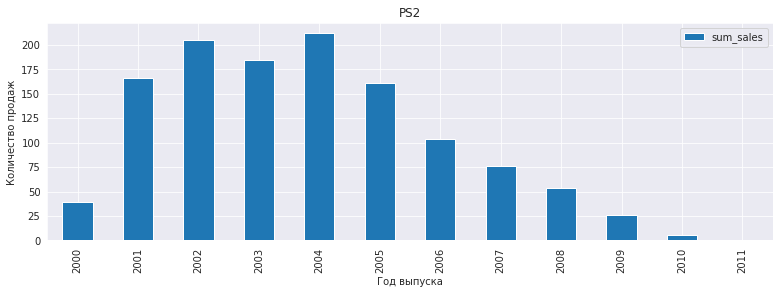

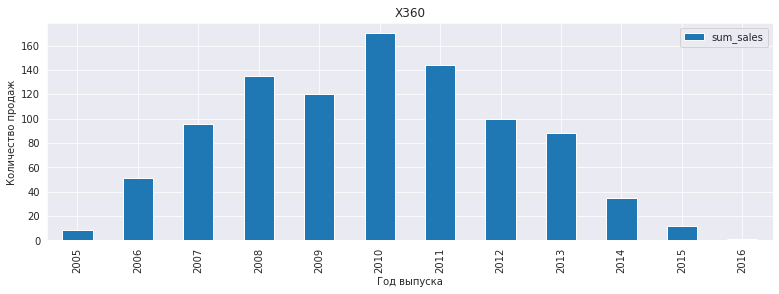

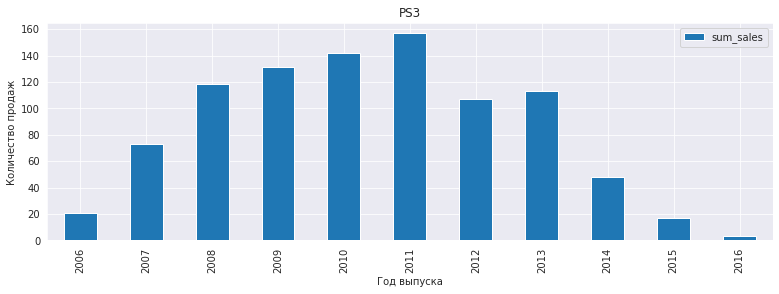

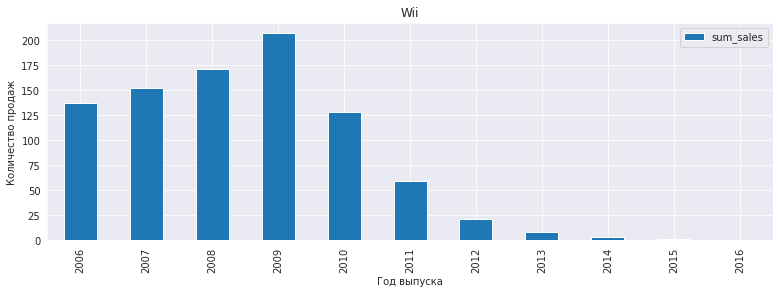

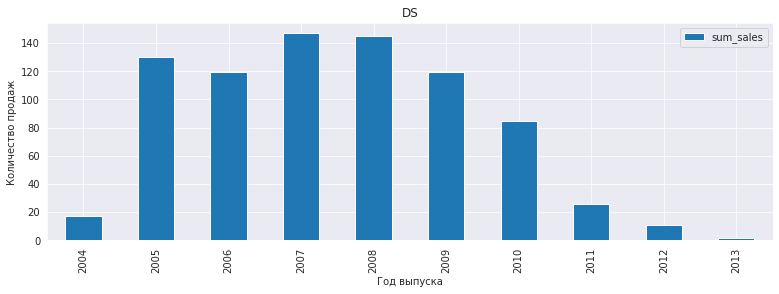

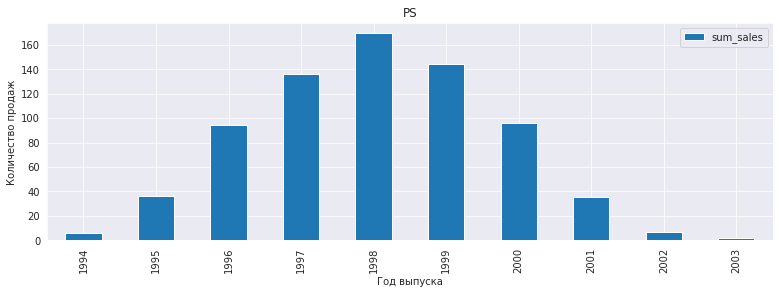

In [88]:
data['platform'].unique() #посмотрим уникальные значения в столбце с названиями платформ
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'] #создали список топ платформ с наибольшими суммарными продажами
for platform in top_platform:
    display(data[data['platform'] == platform].pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4)))
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество продаж')

Изучив графики, мы можем сделать вывод, что жизненый цикл платформы 9-11 лет, видно, что пиковые значения по продажам наблюдаются на 4-5 году существования платформы, далее продажи идут на спад. Таким образом, для того, чтобы построить прогноз на 2017 год, будет достаточно взять данные за последние 10 лет - с 2006 по 2016.

In [89]:
data = data[data['year_of_release']>=2006]

Посмотрим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ. Для этого построим сводную таблицу и график.

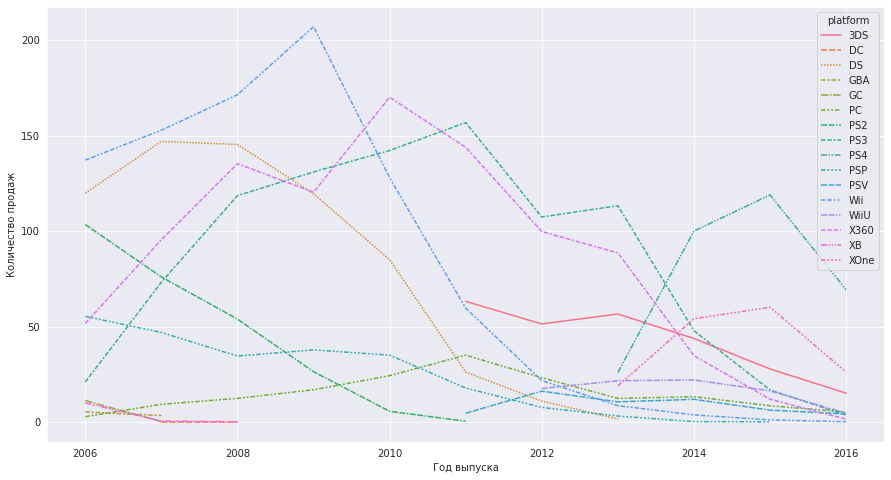

In [90]:
platform_sales_dynamics = data.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
plt.figure(figsize=(15,8))
sns.lineplot(data=platform_sales_dynamics)
sns.set_style('darkgrid')
plt.xlabel("Год выпуска")
plt.ylabel('Количество продаж')
None

У всех платформ за исследуемый нами период наблюдается спад продаж по всем платформам к 2016 году. Также мы видим, что в 2013 году появились новые платформы (PS4, XOne), а продажи по старым (DS, X360, PS3)  приостановились или пошли на спад. Таким образом, в нашем исследовании, нацеленном на простроение прогноза на 2017 год, будет более правильным смотреть динамику с **2013 года.**

In [91]:
actual_data = data[data['year_of_release']>=2013]

Посмотрим динамику продаж за актуальный период в численном представлении.

In [92]:
platform_sales_dynamics = pd.pivot_table(actual_data, index=['platform','year_of_release'], 
                                     values='sum_sales', aggfunc = 'sum')
display(platform_sales_dynamics)

sum_sales
platform year_of_release           
3DS      2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2013                  1.54
PC       2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

Из таблицы видно, что положительная динамика продаж на 2015 год наблюдается у двух платформ - **PS4, XOne**, также они лидируют по продажам в 2015 году (118.90 и 60.14 соответственно). Несмотря на отрицательную динамику за расматриваемый период, относительно большие объемы продаж в 2015 демонстрируют: **3DS (27.78), PS3 (16.82), WiiU (16.35)**.

Посмотрим ТОП-5 платформ по объему продаж за актуальный период (2013-2016):

In [93]:
top_5_platform = actual_data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(
    by='sum_sales', ascending=False)
display(top_5_platform)

,sum_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


ТОП-5 платформ по объему продаж за актуальный период (2013-2016): **PS4, XOne, 3DS, PS3, X360**

Потенциально прибыльные платформы: **PS4, XOne, WiiU**

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

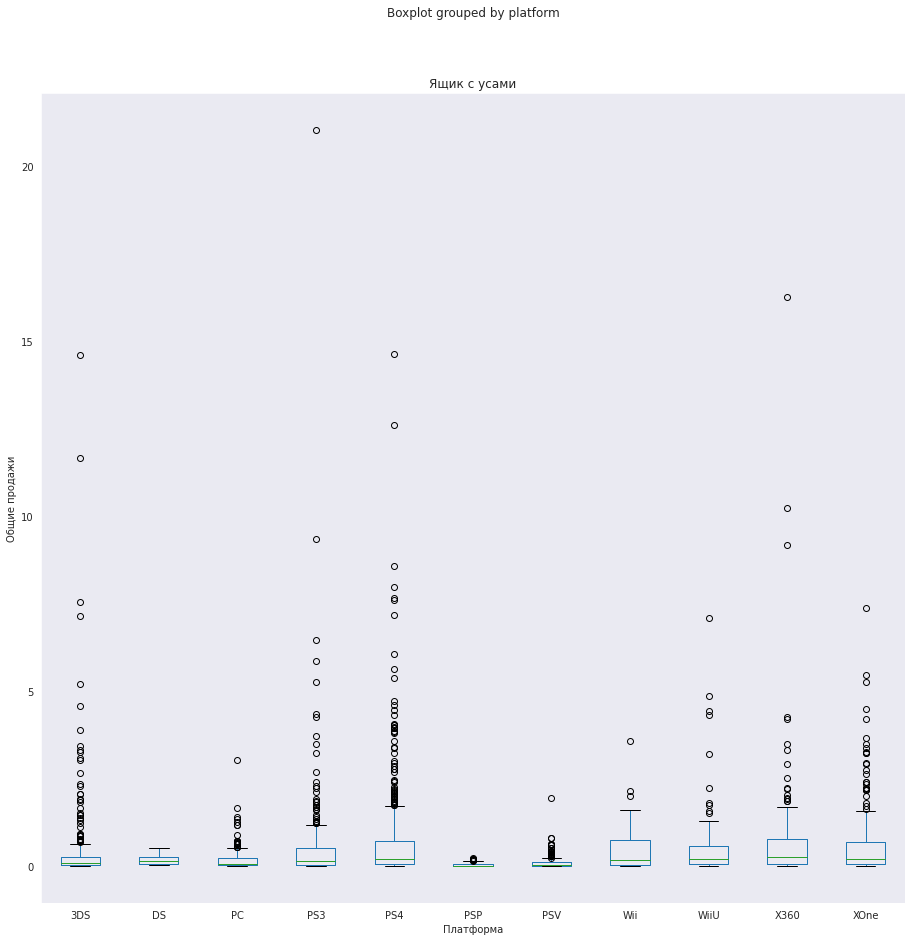

In [94]:
#строим диаграмму со всеми выбросами
actual_data.boxplot(column='sum_sales', by='platform',
                        figsize=(15,15), grid=False).set(title='Ящик с усами', xlabel='Платформа', ylabel='Общие продажи');

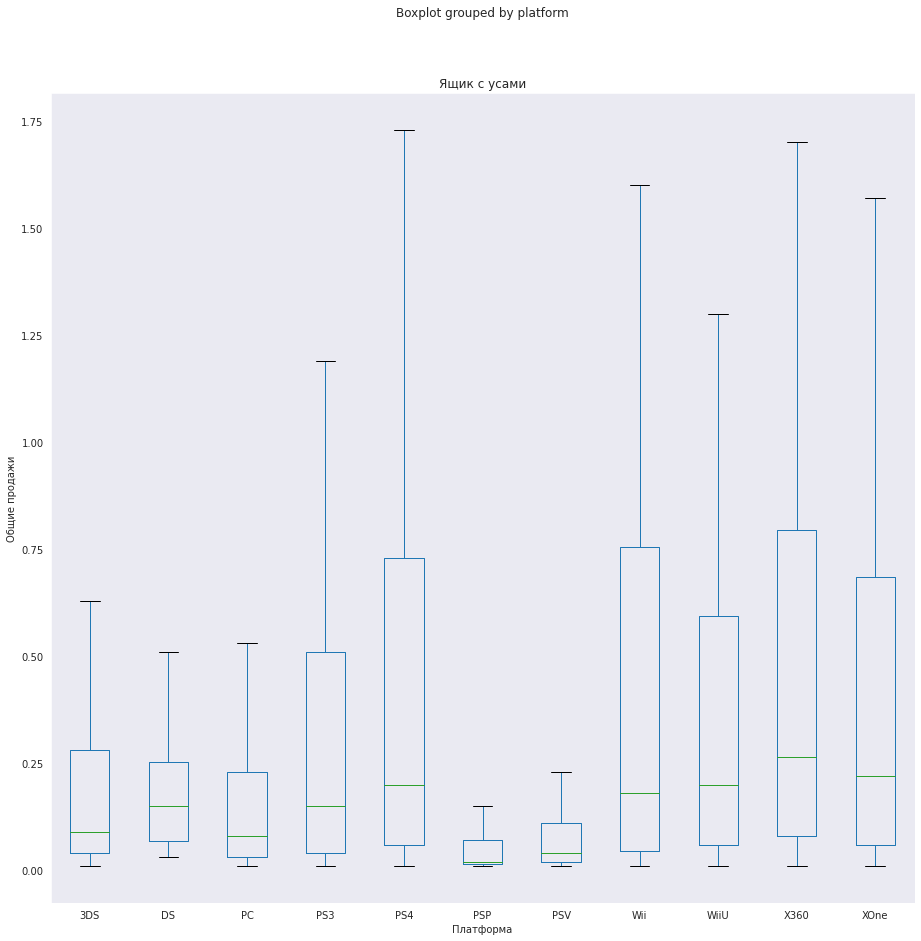

In [95]:
#строим масштабированную диаграмму с крупными боксплотами

actual_data.boxplot(column='sum_sales', by='platform', figsize=(15,15),showfliers=False,
                    grid=False).set(title='Ящик с усами', xlabel='Платформа', ylabel='Общие продажи');

- Минимальное значение - мы видим, что минимальное значение по всем платформам находится не выше 0.1 миллиона проданных копий
- Нижний квартиль - самый минимальный результат показали платформы PSV, PC, PSP, максимальные значения наблюдаются у плфторм X360, DS
- Медиана - низкие результаты показали платформы PSV, PS, PSP, выше всех медиана расположена у DS, далее X360, XOne, WiiU
- Верхний квартиль - самый минимальный результат показали платформы PSV, PSP, максимальные значения наблюдаются у платформ X360, WiiU
- Мы видим, что у платформ 3DS, PC, PS3, PS4, XOne много выбросов, следовательно, на этих платформах выходили очень успешные игры по количеству продаж. 

Таким образом, можно сделать вывод о том, что X360, XOne, WiiU показывают более крупные продажи за рассматриваемый период, PS4, PS3, Wii, PC, DS показывают средние результаты, а аутсайдерами по разбросу продаж являются 3DS, PSV, PSP - маленькие "коробки" означают меньший объем продаж. Также наличие выбросов по отдельным платформам говорит о том, что при оценке продаж необходимо смотреть на медианные значения у топовых платформ.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Для начала определим популярные платформы. Ранее мы определили ТОП-5 платформ по объему продаж за актуальный период (2013-2016): **PS4, XOne, 3DS, PS3, X360**. Исследуем данные по одной из этих платформ, например, PS4.

Коэффициент корреляции (отзывы критиков): 0.406


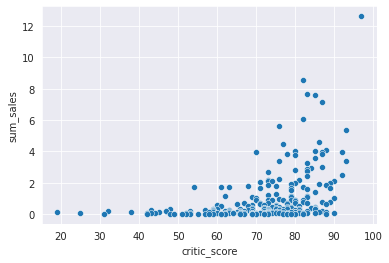

In [96]:
actual_data_PS4 = actual_data.query('platform == "PS4" & user_score != -1')

#строим график и считаем корреляцию по оценкам критиков
ax = sns.scatterplot(x = 'critic_score', y = 'sum_sales', data = actual_data_PS4)
corr_sales_critic_score_PS4 = actual_data_PS4['critic_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы критиков):', '{:.3f}'.format(corr_sales_critic_score_PS4))

Коэффициент корреляции (отзывы пользователей): -0.032


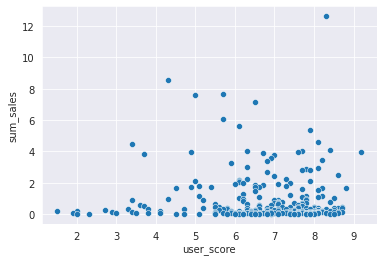

In [97]:
#строим график по оценкам пользователей
ax = sns.scatterplot(x = 'user_score', y = 'sum_sales', data = actual_data_PS4)
corr_sales_user_score_PS4 = actual_data_PS4['user_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы пользователей):', '{:.3f}'.format(corr_sales_user_score_PS4))

Вывод: графики и коэффциент корреляции показывают средннюю зависимость оценок критиков и объема продаж игр плтаформы PS4 и слабую зависимость оценок пользователей и объема продаж игр плтаформы PS4.

Соотнесем выводы с продажами игр на других платформах. Для этого построим такие же графики для других платформ.

Коэффициент корреляции (отзывы критиков): 0.412


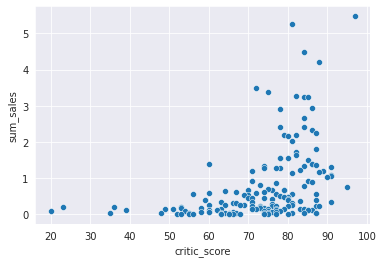

In [98]:
actual_data_XOne = actual_data.query('platform == "XOne" & user_score != -1')

#строим график и считаем корреляцию по оценкам критиков
ax = sns.scatterplot(x = 'critic_score', y = 'sum_sales', data = actual_data_XOne)
corr_sales_critic_score_XOne = actual_data_XOne['critic_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы критиков):', '{:.3f}'.format(corr_sales_critic_score_XOne))

Коэффициент корреляции (отзывы пользователей): -0.069


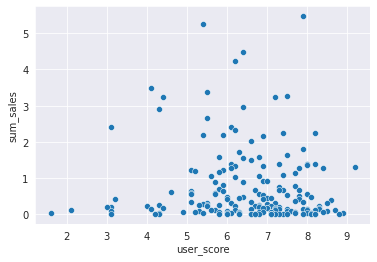

In [99]:
#строим график по оценкам пользователей
ax = sns.scatterplot(x = 'user_score', y = 'sum_sales', data = actual_data_XOne)
corr_sales_user_score_XOne = actual_data_XOne['user_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы пользователей):', '{:.3f}'.format(corr_sales_user_score_XOne))

Коэффициент корреляции (отзывы критиков): 0.339


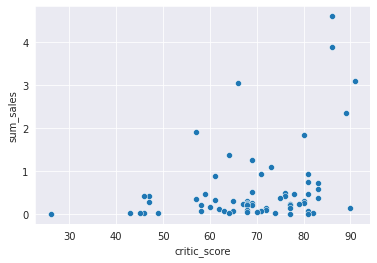

In [100]:
actual_data_3DS = actual_data.query('platform == "3DS" & user_score != -1')

#строим график и считаем корреляцию по оценкам критиков
ax = sns.scatterplot(x = 'critic_score', y = 'sum_sales', data = actual_data_3DS)
corr_sales_critic_score_3DS = actual_data_3DS['critic_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы критиков):', '{:.3f}'.format(corr_sales_critic_score_3DS))

Коэффициент корреляции (отзывы пользователей): 0.242


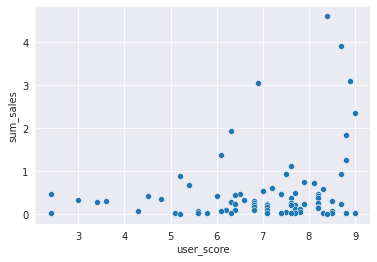

In [101]:
#строим график по оценкам пользователей
ax = sns.scatterplot(x = 'user_score', y = 'sum_sales', data = actual_data_3DS)
corr_sales_user_score_3DS = actual_data_3DS['user_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы пользователей):', '{:.3f}'.format(corr_sales_user_score_3DS))

Коэффициент корреляции (отзывы критиков): 0.334


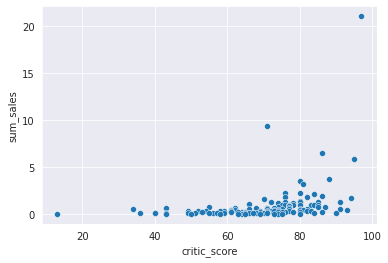

In [102]:
actual_data_PS3 = actual_data.query('platform == "PS3" & user_score != -1')

#строим график и считаем корреляцию по оценкам критиков
ax = sns.scatterplot(x = 'critic_score', y = 'sum_sales', data = actual_data_PS3)
corr_sales_critic_score_PS3 = actual_data_PS3['critic_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы критиков):', '{:.3f}'.format(corr_sales_critic_score_PS3))

Коэффициент корреляции (отзывы пользователей): 0.002


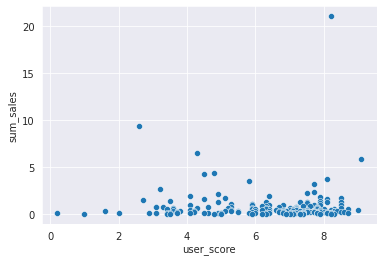

In [103]:
#строим график по оценкам пользователей
ax = sns.scatterplot(x = 'user_score', y = 'sum_sales', data = actual_data_PS3)
corr_sales_user_score_PS3 = actual_data_PS3['user_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы пользователей):', '{:.3f}'.format(corr_sales_user_score_PS3))

Коэффициент корреляции (отзывы критиков): 0.350


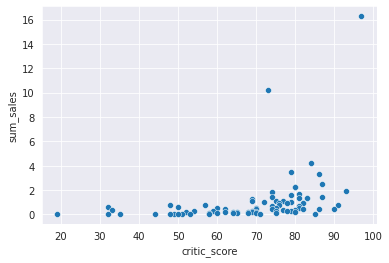

In [104]:
actual_data_X360 = actual_data.query('platform == "X360" & user_score != -1')

#строим график и считаем корреляцию по оценкам критиков
ax = sns.scatterplot(x = 'critic_score', y = 'sum_sales', data = actual_data_X360)
corr_sales_critic_score_X360 = actual_data_X360['critic_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы критиков):', '{:.3f}'.format(corr_sales_critic_score_X360))

Коэффициент корреляции (отзывы пользователей): -0.012


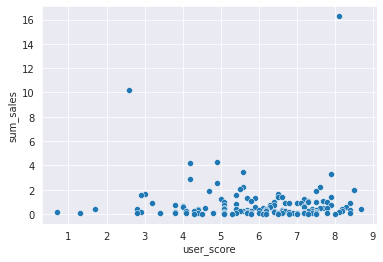

In [105]:
#строим график по оценкам пользователей
ax = sns.scatterplot(x = 'user_score', y = 'sum_sales', data = actual_data_X360)
corr_sales_user_score_X360 = actual_data_X360['user_score'].corr(data['sum_sales'])
print('Коэффициент корреляции (отзывы пользователей):', '{:.3f}'.format(corr_sales_user_score_X360))

Вывод: мы соотнесли выводы, сделанные по анализу коррлеяции между оценками критиков и пользователей одной популярной платформы с друими платформами, и выше сделанный вывод подтвердился: графики и коэффциент корреляции по другим платформам также показывают слабуюю или среднюю зависимость оценок критиков и объема продаж и слабую зависимость или ее отсутствие между оценками пользователей и объемами продаж платформ. Это означает, что покупатели обращают внимание на рейтинги критиков при покупке игры.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,genre,sum_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


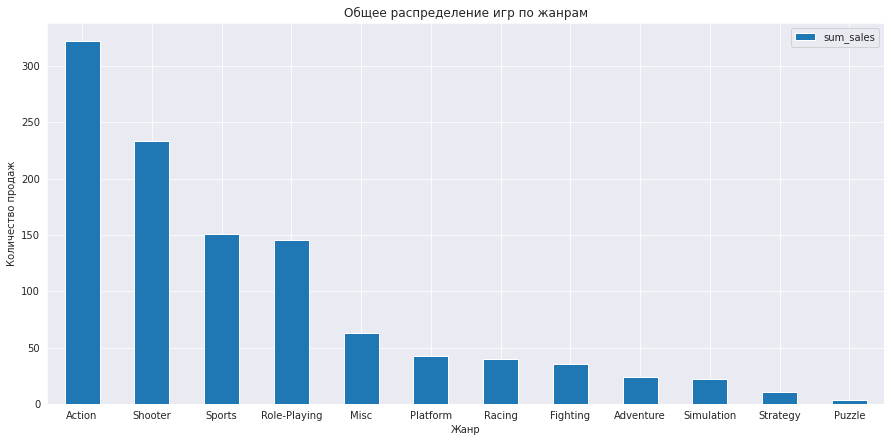

In [106]:
distr_genre = actual_data.pivot_table(
    index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
display(distr_genre)

ax = distr_genre.plot.bar(x='genre', y='sum_sales', rot=0, figsize=(15,7), 
                          title='Общее распределение игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Количество продаж')
None

In [107]:
distr_genre_platform_mean = actual_data.pivot_table(index=['platform', 'genre'], values='sum_sales', aggfunc='mean')
pd.set_option('display.max_rows', None)
display(distr_genre_platform_mean.sort_values(by='sum_sales'))

sum_sales
platform genre                  
PSV      Simulation     0.016667
PS4      Puzzle         0.020000
PSP      Fighting       0.020000
         Strategy       0.020000
         Misc           0.021250
         Adventure      0.021515
DS       Sports         0.030000
         Adventure      0.030000
PSV      Puzzle         0.030000
         Racing         0.033333
PC       Platform       0.035000
PS3      Puzzle         0.040000
PSV      Adventure      0.040116
PC       Adventure      0.046364
PSV      Strategy       0.050000
PC       Fighting       0.050000
WiiU     Adventure      0.056667
3DS      Shooter        0.060000
PC       Racing         0.060625
PSP      Action         0.071667
PSV      Action         0.077760
         Platform       0.078333
DS       Misc           0.080000
PS4      Strategy       0.103333
3DS      Strategy       0.115455
PS3      Simulation     0.118333
PSV      Fighting       0.119000
         Sports         0.122353
3DS      Adventure      0.123333
PSV      Role-Playing   0.131154
PSP      Sports         0.138000
XOne     Strategy       0.140000
Wii      Simulation     0.140000
PC       Action         0.145200
PSP      Role-Playing   0.147143
PS3      Adventure      0.148966
PC       Sports         0.150769
PS3      Strategy       0.152500
X360     Adventure      0.160000
XOne     Simulation     0.172500
PC       Misc           0.177500
Wii      Adventure      0.180000
XOne     Platform       0.186000
         Adventure      0.191429
3DS      Puzzle         0.192222
WiiU     Simulation     0.200000
PSV      Misc           0.202632
PS4      Simulation     0.205000
DS       Simulation     0.210000
3DS      Misc           0.221875
X360     Simulation     0.222500
PS4      Adventure      0.226429
3DS      Sports         0.227500
DS       Action         0.250000
PC       Strategy       0.251500
PS3      Fighting       0.252083
X360     Racing         0.255833
Wii      Strategy       0.260000
PC       Role-Playing   0.270556
X360     Strategy       0.280000
3DS      Action         0.293448
WiiU     Action         0.307292
PC       Shooter        0.307500
Wii      Sports         0.316667
WiiU     Puzzle         0.330000
PS3      Role-Playing   0.336531
DS       Platform       0.345000
XOne     Fighting       0.350000
Wii      Action         0.352500
X360     Platform       0.356667
         Fighting       0.364286
PS3      Platform       0.370000
WiiU     Role-Playing   0.386000
PC       Simulation     0.386190
XOne     Misc           0.391053
PS4      Misc           0.409500
WiiU     Misc           0.410000
XOne     Action         0.438941
PS3      Misc           0.464444
PS4      Fighting       0.480556
XOne     Racing         0.489500
WiiU     Sports         0.492000
PS3      Racing         0.496923
X360     Role-Playing   0.553750
PS4      Role-Playing   0.568431
3DS      Platform       0.586000
WiiU     Strategy       0.610000
PS3      Action         0.622105
3DS      Simulation     0.635333
PS4      Racing         0.638947
         Platform       0.640833
         Action         0.667361
WiiU     Shooter        0.685000
PS3      Sports         0.688298
XOne     Sports         0.703684
PSV      Shooter        0.720000
XOne     Role-Playing   0.753571
X360     Action         0.767581
         Sports         0.837419
Wii      Misc           1.008571
PS3      Shooter        1.025484
X360     Shooter        1.043529
WiiU     Platform       1.084667
3DS      Role-Playing   1.086613
Wii      Platform       1.125000
3DS      Fighting       1.172857
PS4      Sports         1.208913
X360     Misc           1.387778
WiiU     Fighting       1.522500
XOne     Shooter        1.587632
PS4      Shooter        2.160000
WiiU     Racing         3.680000

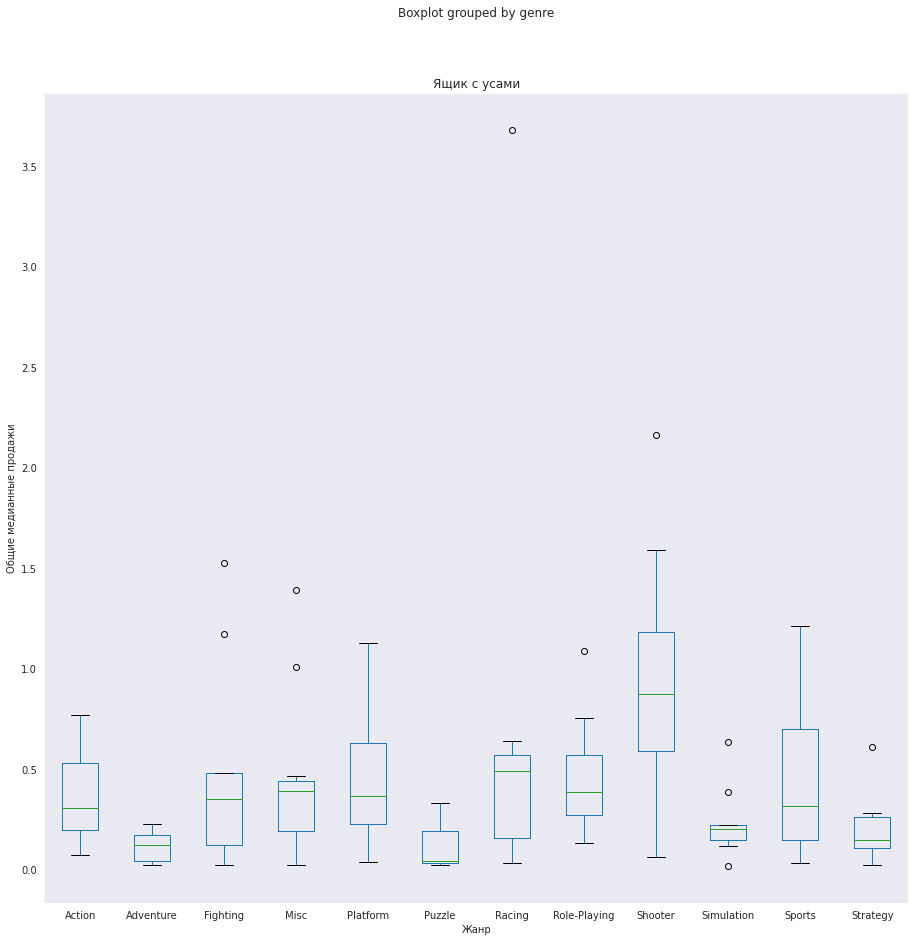

In [108]:
distr_genre_platform_mean.boxplot(column='sum_sales', by='genre',
                        figsize=(15,15), grid=False).set(title='Ящик с усами', xlabel='Жанр', ylabel='Общие медианные продажи');

**Вывод:** 

По этому графику мы видим, что среди всех жанров сильно выделяется "коробка" жанра Shooter, этот жанр можно считать самым успешным, так как он популярен на многих платформах.

Также прибыльными жанрами являются: Racing (в таблице выше мы увидели, что большие средние продажи зафиксированы на платформе WiiU, на других платформах этот жанр продавался не так хорошо), Platform, Sports, Fighting, Action

Неприбыльные жанры: Simulatuon, Puzzle, Adventure

**Вывод:**
- Жизненый цикл платформы 9-11 лет, видно, что пиковые значения по продажам наблюдаются на 4-5 году существования платформы, далее продажи идут на спад.
- В 2013 году появились новые платформы (PS4, XOne), а продажи по старым (DS, X360, PS3) приостановились или пошли на спад. Таким образом, в нашем исследовании, нацеленном на простроение прогноза на 2017 год, были выбраны акутальные данные за 2013-2016 годы
- ТОП-5 платформ по объему продаж за актуальный период (2013-2016): PS4, XOne, 3DS, PS3, X360
- Потенциально прибыльные платформы: PS4, XOne, WiiU
- X360, XOne, WiiU показывают более крупные продажи за рассматриваемый период, PS4, PS3, Wii, PC, DS показывают средние результаты, а меньший объем продаж наблюдается у платформ 3DS, PSV, PSP
- Графики и коэффциент корреляции по платформам показывают слабуюю или среднюю зависимость оценок критиков и объема продаж и слабую зависимость или ее отсутствие между оценками пользователей и объемами продаж платформ
- Самыми прибыльнымм жанром является Shooter

### Портрет пользователя каждого региона (NA, EU, JP)

Самые популярные платформы (топ-5). Описать различия в долях продаж.

In [109]:
#посмотрим топ-5 платформ Северной Америки (миллионы проданных копий)
top_5_platform_na = actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)
display(top_5_platform_na)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


**Вывод: Топ-5 платформ для Северной Америки за актуальный период: PS4, XOne, X360, PS3, 3DS**

In [110]:
#посмотрим топ-5 платформ Европы (миллионы проданных копий)
top_5_platform_eu = actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)
display(top_5_platform_eu)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


**Вывод: Топ-5 платформ Европы за актуальный период: PS4, PS3, XOne, X360, 3DS**

In [111]:
#посмотрим топ-5 платформ Японии (миллионы проданных копий)
top_5_platform_jp = actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)
display(top_5_platform_jp)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


**Вывод: Топ-5 платформ Японии за актуальный период: 3DS, PS3, PSV, PS4, WiiU**

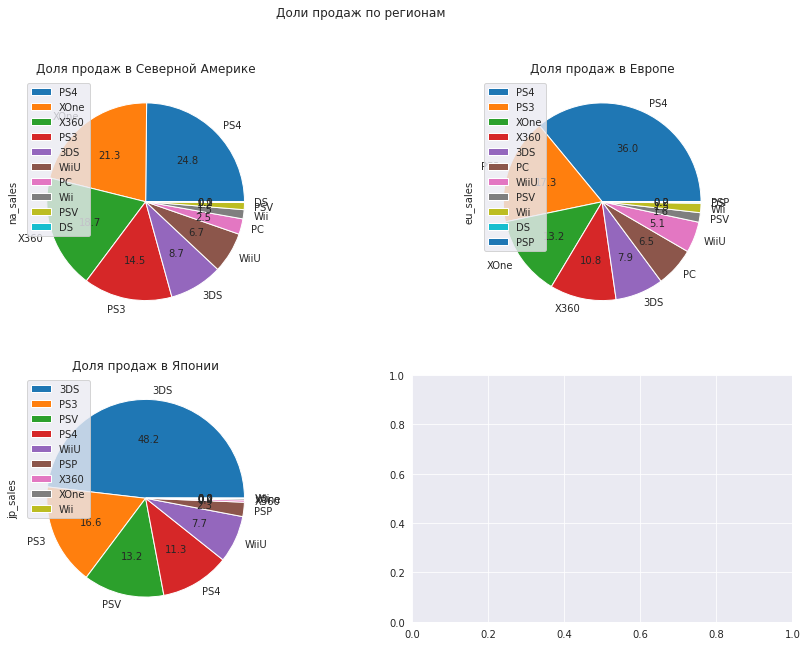

In [112]:
#сравним топ-5 платформ по регионам
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
fig.suptitle('Доли продаж по регионам')

top_5_platform_na.plot(subplots=True, autopct='%.1f', kind='pie', ax=axes[0,0]); 
axes[0,0].set_title('Доля продаж в Северной Америке')

top_5_platform_eu.plot(subplots=True, autopct='%.1f', kind='pie', ax=axes[0,1]); 
axes[0,1].set_title('Доля продаж в Европе')

top_5_platform_jp.plot(subplots=True, autopct='%.1f', kind='pie', ax=axes[1,0]); 
axes[1,0].set_title('Доля продаж в Японии');

Вывод: Портрет пользователя по популярным платформам отличается: в Северной Америке большую долю продаж занимают PS4, XOne, X360 - относительно новые платформы для более продвинутых игр, в Европе большую долю продаж занимают PS3, PS4, XOne - серия приставок Play Station пользуется популярностью, а в Японии портрет сильно отличается от других регионов - лидиркт по продажам плафтормы 3DS, PS3 и PSV, можем сделать вывод, что японцы являются приверженцами портативных консолей и игровых систем, а также интересно, что популярные в двух других регионах игровые приставки от компании Microsoft (XOne, X360) занимают малые доли продаж среди всех платформ.

Самые популярные жанры (топ-5). Пояснить разницу.

In [113]:
#посмотрим топ-5 популярных жанров игр Северной Америки
distr_genre_na = actual_data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(distr_genre_na)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


**Топ-5 жанров игр Северной Америки за актуальный период: Action, Shooter, Sports, Role-Playing	, Misc**

In [114]:
#посмотрим топ-5 популярных жанров игр Европы
distr_genre_eu = actual_data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(distr_genre_eu)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


**Топ-5 жанров игр Европы за актуальный период: Action, Shooter, Sports, Role-Playing , Racing**

In [115]:
#посмотрим топ-5 популярных жанров игр Японии
distr_genre_jp = actual_data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(distr_genre_jp)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


**Топ-5 жанров игр Японии за актуальный период: Role-Playing, Action, Misc, Fighting , Shooter**

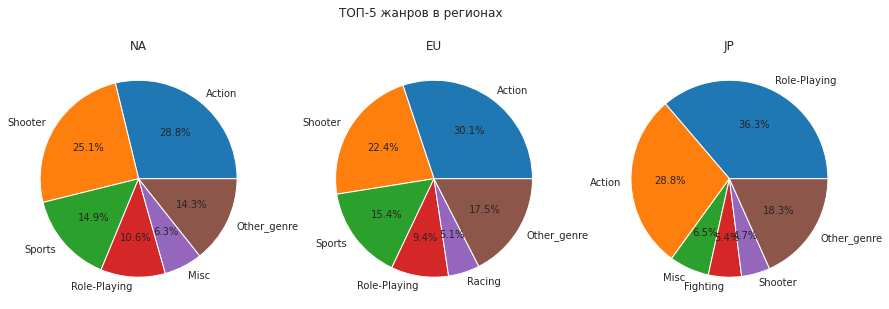

In [116]:
#сравним топ-5 жанров игр по регионам

countries = actual_data.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (actual_data.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: actual_data[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Можно сделать вывод о том, что портерт пользователя в Северной Америке и Европе похож: топ-5 игр по жанрам почти идентичен, а вот пользователи Японии отличаются: топ-1 жанр в этом регионе Role-Playing (что связано с культурными особенностями этой страны), а жанр Sports, занимающий третье место в Северной Америке и Европе, в топ-5 Японии не вошел.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расшифруем значения:
- М - «Mature» — «Для взрослых»
- Е - «Everyone» — «Для всех»
- Е10+ - «Everyone 10 and older» — «Для всех от 10 лет и старше»
- Т - «Teen» — «Подросткам»

In [117]:
#посмотрим, как влияет рейтинг ESRB на продажи в Северной Америке
rating_na = actual_data.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(rating_na)

,na_sales
rating,
M,165.21
no_rating,89.42
E,79.05
E10+,54.24
T,49.79


В Северной Америке преобладают продажи игр с рейтингом ESRB М - для взрослых, также наблюдается много игр без рейтинга.

In [118]:
#посмотрим, как влияет рейтинг ESRB на продажи в Европе
rating_eu = actual_data.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(rating_eu)

,eu_sales
rating,
M,145.32
E,83.36
no_rating,78.91
E10+,42.69
T,41.95


В Европе преобладают продажи игр с рейтингом ESRB М - для взрослых, также наблюдается много игр без рейтинга.

In [119]:
#посмотрим, как влияет рейтинг ESRB на продажи в Японии
rating_jp = actual_data.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(rating_jp)

,jp_sales
rating,
no_rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


В Японии преобладают продажи игр без рейтинга ESRB - в этом регионе данный рейтинг не актуален. 

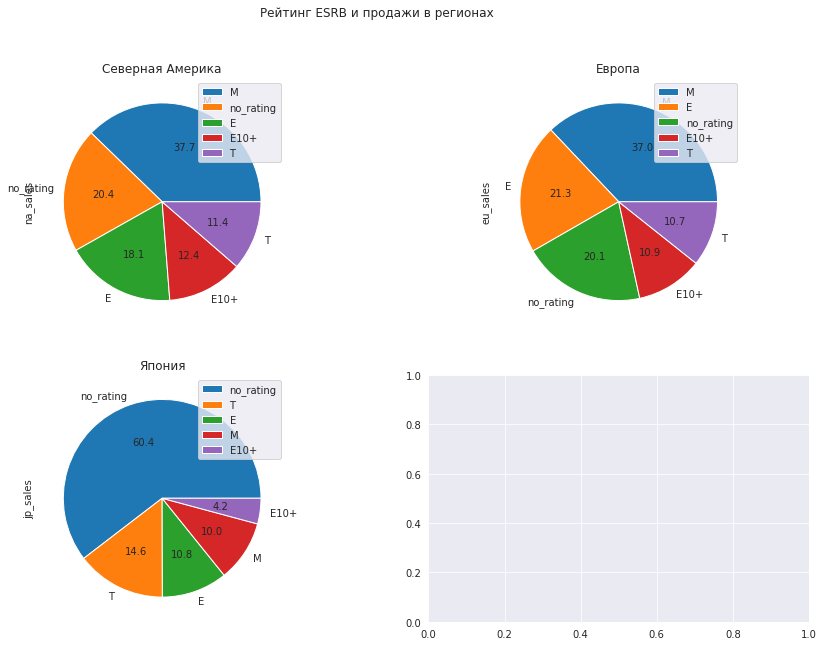

In [120]:
#сравним рейтинг и продажи в регионах
fig, axes = plt.subplots(figsize=(15,10), nrows=2, ncols=2)
fig.suptitle('Рейтинг ESRB и продажи в регионах')

rating_na.plot(subplots=True, autopct='%.1f', kind='pie', ax=axes[0,0]); 
axes[0,0].set_title('Северная Америка')

rating_eu.plot(subplots=True, autopct='%.1f', kind='pie', ax=axes[0,1]); 
axes[0,1].set_title('Европа')

rating_jp.plot(subplots=True, autopct='%.1f', kind='pie', ax=axes[1,0]); 
axes[1,0].set_title('Япония');

В качестве вывода отметим, что в очередной раз портрет пользователя Японии сильно отличается от портретов пользователей Северной Америки и Европы: если в Северной Америке и Европе очвеидно преобладают продажи игр, помеченных рейтингом ESRB М (для взрослых), то в Японии преобладают продажи игр без рейтинга ESRB - в этом регионе данный рейтинг не актуален. А также это может быть связано с тем, что популярные жанры в Японии сильно отличаются от североамериканских и европейских, например, лидирующий в Европе и США жанра Shooter, описание которого подходит под рейтинг ESRV "для взрослых" (наличие сцен убийства и крови) в Японии по популярности находитс на пятом месте.

**Вывод:**
- Северная Америка:
   - Топ-5 платформ для Северной Америки за актуальный период: PS4, XOne, X360, PS3, 3DS
   - Топ-5 жанров игр Северной Америки за актуальный период: Action, Shooter, Sports, Role-Playing , Misc
   - В Северной Америке преобладают продажи игр с рейтингом ESRB М - для взрослых
- Европа:
   - Топ-5 платформ Европы за актуальный период: PS4, PS3, XOne, X360, 3DS
   - Топ-5 жанров игр Европы за актуальный период: Action, Shooter, Sports, Role-Playing , Racing
   - В Европе преобладают продажи игр с рейтингом ESRB М - для взрослых
- Япония:
   - Топ-5 платформ Японии за актуальный период: 3DS, PS3, PSV, PS4, WiiU
   - Топ-5 жанров игр Японии за актуальный период: Role-Playing, Action, Misc, Fighting , Shooter
   - В Японии преобладают продажи игр без рейтинга ESRB - в этом регионе данный рейтинг не актуален.

Портрет пользователя в Северной Америке и Европе почти одинаковый, а Япония сильно отличается от других регионов.

### Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (Зададим значение alpha = 0.05)

Сформулируем гипотезы:

- Нулевая гипотеза H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза H_a: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [121]:
from scipy import stats as st #импорт библиотеки для проверки гипотез

value_XOne = actual_data.loc[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] != -1), 'user_score'] #выбрали данные по платформе Xbox One
value_PC = actual_data.loc[(actual_data['platform'] == 'PC') & (actual_data['user_score'] != -1), 'user_score'] #выбрали данные по платформе PC


#Выполним проверку гипотезы. Будем использовать метод ttest_ind

results = st.ttest_ind(
    value_XOne.dropna(), 
    value_PC.dropna(), equal_var = False) # вызов метода для проверки гипотезы

alpha = .05 # значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 

# условный оператор с выводом строки с ответов

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


In [122]:
#Посчитаем средние пользовательские рейтинги по платформам как иллюстрацию не противоречивости гипотезы
print('Средний рейтинг пользователей для платформы XOne:', value_XOne.mean())
print('Средний рейтинг пользователей для платформы PC:', value_PC.mean())

Средний рейтинг пользователей для платформы XOne: 6.521428571428572
Средний рейтинг пользователей для платформы PC: 6.269677419354839


Вывод: p-value > 0.05, значит оснований опровергнуть H_0 нет. Это говорит о том, что **нет статистически значимых различий между пользовательскими рейтингами платформ Xbox One и PC**

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные (Зададим значение alpha = 0.05)

Сформулируем гипотезы:

- Нулевая гипотеза H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза H_a: Средние пользовательские рейтинги жанров Action и Sports различаются

In [123]:
value_action = actual_data.loc[(actual_data['genre'] == 'Action') & (actual_data['user_score'] != -1), 'user_score'] #выбрали данные по жанру Action
value_sports = actual_data.loc[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] != -1), 'user_score'] #выбрали данные по жанру Sports

#Выполним проверку гипотезы. Будем использовать метод ttest_ind

results = st.ttest_ind(
    value_action.dropna(), 
    value_sports.dropna(), equal_var = False) # вызов метода для проверки гипотезы

alpha = .05 # значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран 

# условный оператор с выводом строки с ответов

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [124]:
#Посчитаем средние пользовательские рейтинги по жанрам как иллюстрацию не противоречивости гипотезы
print('Средний рейтинг пользователей для жанра Action:', value_action.mean())
print('Средний рейтинг пользователей для жанра Sports:', value_sports.mean())

Средний рейтинг пользователей для жанра Action: 6.837532133676092
Средний рейтинг пользователей для жанра Sports: 5.238125


Вывод: p-value < 0.05, значит есть основания опровергнуть H_0. Это говорит о том, что **есть статистически значимые различия между пользовательскими рейтингами жанров Action и Sports**

Пояснить:
- Как сформулировали нулевую и альтернативную гипотезы;


Сначала была сформулирована нулевая гипотеза - утверждение о том, что платформы или жанры одинаковые, а затем на основе нулевой гипотезы была сформулирована - это утверждение, которое принимается верным, если отбрасывается нулевая гипотеза.. Таким образом, если в нашем случае нулевая гипотеза подразумевала одинаковые средние пользовательские оценки, то в альтернативной они будут разные.


- Какой критерий применили для проверки гипотез и почему.

Для проверки гипотез был применен метод `ttest_ind`, так как это специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, что как раз является подходящим методом для проверки данных гипотез.

### Общий вывод

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">

В данном прокте мы провели комплексное исследование исторических данных компании "Стримчик" о продажах компьютерных игр по всему миру. Нашей задачей было — **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

В **предобработке данных** мы заполнили пропуски там, где это можно было сделать и добавили заглушки в пропусках, которые могли бы повлиять на результат анализа, в результате были внесены следующие изменения в исходные данные:

- в столбцах `name`, `genre` удалили 0.011% строк с пропусками
- в столбце `year_of_release` удалили 1.6% строк с пропусками
- в столбце `user_score` заменили значения 14.4% строк с пропусками 'tbd' на заглушку -1
- в столбце `rating` заменили пропуски заглушкой 'no_rating'

После предобработки датафрейм для исследования содержит 16443 строки, было удалено 1.6% первоначальных данных.

В ходе **исследовательского анализа** были выявлены закономерности, определяющие успешность игры:

1. Потенциально прибыльные платформы: PS4, XOne, WiiU
2. Самыми прибыльным жанром являетя Shooter
3. На продажи влияют оценки критиков

Также было составлен **портрет пользователя каждого региона**:

- Северная Америка:
   - Топ-5 платформ для Северной Америки за актуальный период: PS4, XOne, X360, PS3, 3DS
   - Топ-5 жанров игр Северной Америки за актуальный период: Action, Shooter, Sports, Role-Playing , Misc
   - В Северной Америке преобладают продажи игр с рейтингом ESRB М - для взрослых
- Европа:
   - Топ-5 платформ Европы за актуальный период: PS4, PS3, XOne, X360, 3DS
   - Топ-5 жанров игр Европы за актуальный период: Action, Shooter, Sports, Role-Playing , Racing
   - В Европе преобладают продажи игр с рейтингом ESRB М - для взрослых
- Япония:
   - Топ-5 платформ Японии за актуальный период: 3DS, PS3, PSV, PS4, WiiU
   - Топ-5 жанров игр Японии за актуальный период: Role-Playing, Action, Misc, Fighting , Shooter
   - В Японии преобладают продажи игр без рейтинга ESRB - в этом регионе данный рейтинг не актуален.
    
В конце исследования были **проверены гипотезы**:
1. Нет статистически значимых различий между пользователсикими рейтингами платформ Xbox One и PC
2. Есть статистически значимые различия между пользовательскими рейтингами жанров Action и Sports
    
Рекомендации для рекламного отдела:
1. Платформы PS4, XOne
2. Жанр - Shooter
3. Рейтинг ESRB - М
4. Рекламировать в Северной Америке и Европе